In [ ]:
import tensorflow as tf                
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
from tqdm import tqdm
from random import shuffle


import keras
import random
import os,sys
import zipfile
import shutil



#Keras provide API for Augmentation helps in generation
from tensorflow.keras.optimizers import RMSprop


# Revision about Deep learning and Neural network


# DNN











# RNN











# CNN











# image classification









## image classification APP-1

In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}


nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

class_names_label

In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['/media/ahmed-ferganey/AI1/01-Learning_AI/AI/01-DlComputerVisionNLP/06ImageClassification/archive/seg_train/seg_train',
                '/media/ahmed-ferganey/AI1/01-Learning_AI/AI/01-DlComputerVisionNLP/06ImageClassification/archive/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [ ]:
from sklearn.utils import shuffle

train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [ ]:
display_examples(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [ ]:
plot_accuracy_loss(history)


In [ ]:
test_loss = model.evaluate(test_images, test_labels)


In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)


In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

## image classification APP-2

Data : 

https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/

In [ ]:
! rm -rf /media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/*

## What is Augmentation and how does it helps?
**Data augmentation** is a technique to increase the size and variation in a given dataset.
It is a well known fact that **Deep Neural Nets** work best if Dataset is huge in both size and variety.

Other Augumentation techniques which can be at root of such exploration is **SMOTE.**


This notebook will cover the aspect of Data Augumentation over Image Data.
Focus will be on **Various techniques** to achieve **Data augmentation** 


we will be using **Tensorflow** and **Keras** for implementation which will help us to understand the various aspect of the field.

More often when data is less in size of not having variety in it, Including **Data augmentation** in **Data preprocessing** steps, help producing larger amount of data with good amount of variety in it. 


Using TensorFlow backend.

* As kaggle does not allow us to do any create,delete or update within "/kaggle/input/" let's copy the dataset to working directory.
* Path of the working directory is "/kaggle/working" and it is easily doable via magic commands. :) 

In [ ]:
! cp -R /media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/input/* /media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working

**Let's verify the data movement**

In [ ]:
#List down all directories in "/kaggle/input/"
for dirName,_,fileName in os.walk("/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/input/microsoft-catsvsdogs-dataset"):
    print(dirName)


In [ ]:
#List down all directories in "/kaggle/working/"
for dirName,_,fileName in os.walk("/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/"):
    count = 0
    print("Directory:: ",dirName)

**Data set contains total of 12501 images and we will use Imagegenerator API of Keras so we need to restructure the directory accordingly.**

In [ ]:
! mkdir /media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/training/
! mkdir /media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/training/Dog/
! mkdir /media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/training/Cat/

! mkdir /media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/testing/
! mkdir /media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/testing/Dog/
! mkdir /media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/testing/Cat/

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE,DESTINATION):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " has not enough pixels to represent it as an image, seems corrupted so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

#####################################################################################

DESTINATION = "/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working"

CAT_SOURCE_DIR = "/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/PetImages/Cat/"
DOG_SOURCE_DIR = "/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/PetImages/Dog/"

TRAINING_CATS_DIR = "/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/training/Cat/"
TESTING_CATS_DIR = "/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/testing/Cat/"

TRAINING_DOGS_DIR = "/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/training/Dog/"
TESTING_DOGS_DIR = "/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/testing/Dog/"

In [ ]:
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size,DESTINATION)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size,DESTINATION)

Imagine the situation that we have to assign a category to an image that it is a **cat** or **dog** is in the image.
and in our sample data set, we have got such images where we have several cats and dogs lined up one after another.

Now how can we play with such images on the fly before giving them to model to get trained on.
Better augment them on the fly and produce a batch of tensors.

Doing the augmentation using **Keras** gives another upper hand to us, It doesn't modify or affect the original data source.

In [ ]:
print("Total Cat iamge count :: ",len(os.listdir(TRAINING_CATS_DIR)))
print("Total Dog iamge count :: ",len(os.listdir(TRAINING_DOGS_DIR)))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show
CAT_TRAINING_DIR , DOG_TRAINING_DIR  =  TRAINING_CATS_DIR,TRAINING_DOGS_DIR

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [ ]:
try:
    # Set up matplotlib fig, and size it to fit 4x4 pics
    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)
    pic_index += 8

    next_cat_pix = [os.path.join(CAT_TRAINING_DIR, fname) for fname in os.listdir('/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/PetImages/Cat/')[pic_index - 8:pic_index]]
    next_dog_pix = [os.path.join(DOG_TRAINING_DIR, fname) for fname in os.listdir('/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/PetImages/Dog/')[pic_index - 8:pic_index]]

    for i, img_path in enumerate(next_cat_pix + next_dog_pix):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('On')  # Don't show axes (or gridlines)
        img = mpimg.imread(img_path)
        plt.imshow(img)

    plt.show()

except:
    pass

**Let's generate an UDF which would be helpful in plotting the various augmentated images from the source image.**

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    #Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18, 18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('on')
    show()

Let's Do some basic augmentation and later we will apply various permutation and combination of these techniques. **Lets start with image rotation by few degrees so that features(Pixel values based on spatial arrangement) get affected and label unaffected.**

In [ ]:
def imageAugmentor():
    data_generator = ImageDataGenerator(rotation_range=180)
    plot(data_generator)

    data_generator = ImageDataGenerator(featurewise_center=False,width_shift_range=0.65)
    plot(data_generator)


    data_generator = ImageDataGenerator(vertical_flip=True,zoom_range=[0.2, 0.9],width_shift_range=0.2)
    plot(data_generator)

    data_generator = ImageDataGenerator(horizontal_flip=True,zoom_range=[1, 1.5],width_shift_range=0.2)
    plot(data_generator)

    data_generator = ImageDataGenerator(width_shift_range=[0.1, 0.5])
    plot(data_generator)

    data_generator = ImageDataGenerator(zoom_range=[1, 2], rotation_range=260)
    plot(data_generator)

In [ ]:
pic_index += 8
next_pic = [
    os.path.join(CAT_TRAINING_DIR, fname) for fname in os.listdir('/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/input/microsoft-catsvsdogs-dataset/PetImages/Cat/')[pic_index - 8:pic_index]
]
image = plt.imread(next_pic[0])
# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
imshow(images[0])
show()

**Few examples regarding how image augmentation looked like before going to model for training.**

In [ ]:
imageAugmentor()

## Let's examine the scenario where augmentation before training can help better at prediction time

##### Dataset we are going to use in this experiment is to detect wether given image is a Cat or Dog

In [ ]:
dict = {}
training_data_path = "/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/training/"
for directory in os.listdir(training_data_path):
    count = 0
    for fileName in os.listdir(training_data_path + directory):
        count += 1

    dict.update({"{0}".format(directory): count})
print(dict)

In [ ]:
class NeuralNet:
    '''
    Responsible for Neural net skeleton
    '''
    '''
    Sequential design of layering to interconnect various layers.
    Hawk eye view would be
     ___________________________________________________
    |conv-->pool-->conv-->pool-->flatten-->dense-->dense|
     ---------------------------------------------------
    
    #Basic parameters to be passed on call 
    #1.training_data_path
    #2.validation_data_path
    #3.callback
    #4.epochs
    #5.batch_size
    #6.learning_rate
    '''
    
    def neuralModeling(self, training_data_path, validation_data_path,
                       callback, epochs, batch_size, learning_rate):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3, 3),activation='relu',input_shape=(150, 150, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        #Model compilation
        model.compile(optimizer=RMSprop(lr=learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

        #model summary
        model.summary()

        #Make datagen for Train generator
        train_datagen = ImageDataGenerator(rescale=1./255)

        #Train generator
        train_generator = train_datagen.flow_from_directory(
            training_data_path,
            target_size=(150, 150),
            batch_size=batch_size,
            class_mode='binary')
        
        #Make datagen for validation generator
        validation_datagen = ImageDataGenerator(rescale=1./255)

        #validation generator
        validation_generator = validation_datagen.flow_from_directory(
            validation_data_path,
            target_size=(150, 150),
            batch_size=batch_size,
            class_mode='binary')
        logdir = "/kaggle/working/logs" + datetime.now().strftime("%Y%m%d-%H%M%S")
        
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
        
        history = model.fit(train_generator,
                            validation_data=validation_generator,
                            epochs=epochs,
                            verbose=1,
                            callbacks = [tensorboard_callback]
                            )

        return history, model

    '''
    Constructor of the class    
    '''
    
    def __init__(self):
        print("Object getting created")

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        
        if (type(logs.get('accuracy'))!= None and logs.get('accuracy') > 0.99):
            print(
                "\n\n\nGot accuracy above 0.99% so cancelling any further training! \n\nas it might cause Overfitting\n\n"
            )
            self.model.stop_training = True


callback = myCallback()

## Model Training
**Let's start the training the model and then run some image prediction directly from Google.com**

In [ ]:
#Training data
training_data_path = "/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/training/"
validation_data_path = "/media/ahmed-ferganey/AI1/00-Database/kaggle/ImageClassification/working/microsoft-catsvsdogs-dataset/testing/"
#Epochs
epochs = 10
#Batch size
batch_size=100
#Learning Rate
learning_rate = 0.001

In [ ]:
''' #Basic parameters to be passed on call 
    #1.training_data_path
    #2.validation_data_path
    #3.callback
    #4.epochs
    #5.batch_size
    #6.learning_rate
'''
net = NeuralNet()
history, model = net.neuralModeling(training_data_path, validation_data_path,callback, epochs, batch_size, learning_rate)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.figure(figsize=(17, 10))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(17,10))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.show()

***Data augmentation does many changes on the fly in every image and makes a batch  before training to model.That is one of the prime reason that model training with data augmentation on is slower but effective.***



## Data Augumentation APP

In [ ]:
# Importing necessary functions
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
		rotation_range = 40,
		shear_range = 0.2,
		zoom_range = 0.2,
		horizontal_flip = True,
		brightness_range = (0.5, 1.5))

img = load_img('/media/ahmed-ferganey/AI1/00-Database/TransferLearning/image.png')
x = img_to_array(img)
x = x.reshape((1, ) + x.shape)
i = 0

#if we use 20 image we will readjust the patch size with 20
for batch in datagen.flow(x, batch_size = 1,
						save_to_dir ='/media/ahmed-ferganey/AI1/00-Database/TransferLearning/preview',
						save_prefix ='image', save_format ='jpeg'):
	i += 1
	if i > 5:
		break

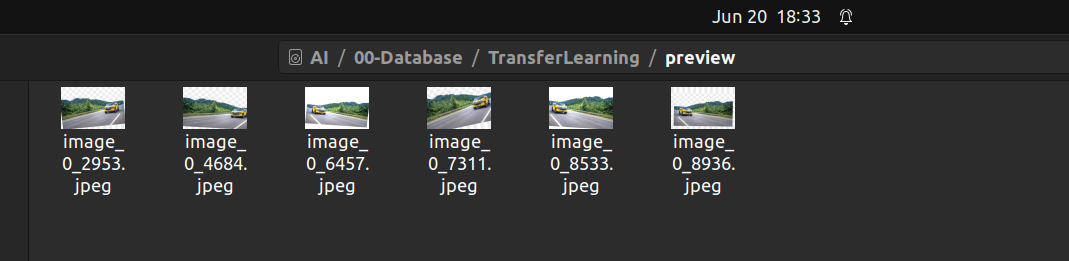

In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
for i in os.listdir('/media/ahmed-ferganey/AI1/00-Database/TransferLearning/preview') :
  plt.imshow(plt.imread(os.path.join('/media/ahmed-ferganey/AI1/00-Database/TransferLearning/preview',i)))
  plt.show()

## Dataaugumentation with Keras with Image classification APP

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random,os

### Define constants

In [ ]:
#/media/ahmed-ferganey/AI1/00-Database/Imageclassification
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3



### Prepare Traning Data

In [ ]:
len(os.listdir('/media/ahmed-ferganey/AI1/00-Database/Imageclassification/training')),len(os.listdir('/media/ahmed-ferganey/AI1/00-Database/Imageclassification/testing'))

In [ ]:
filenames = os.listdir("/media/ahmed-ferganey/AI1/00-Database/Imageclassification/training")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df[df['category']==0]

In [ ]:
df['category'].unique()

In [ ]:
len([i for i in df['filename'].tolist() if 'cat' in i]) , len([i for i in df['filename'].tolist() if 'dog' in i])

### See Total In count

In [ ]:
df['category'].value_counts().plot.bar()

# From our data we have 12000 cats and 12000 dogs

###  See sample image

In [ ]:
sample = random.choice(filenames)
image = load_img("/media/ahmed-ferganey/AI1/00-Database/Imageclassification/training/"+sample)
plt.imshow(image)

### Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# 63*63*32
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# 30*30*64
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# 14*14*128
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

### Callbacks

In [ ]:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau



**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [ ]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [ ]:


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# 0.01
# 0.005
# 0.01
# 0.005
# 0.0025
# 0.000125
# 0.0000000001

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

### Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to dog and 0 to cat

In [ ]:
df["category"] = df["category"].replace({1: 'cat', 0: 'dog'})

In [ ]:

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
train_df['category'].value_counts().plot.bar()

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

### Traning Generator

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [ ]:
train_df

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/media/ahmed-ferganey/AI1/00-Database/Imageclassification/training",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

### Validation Generator

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/media/ahmed-ferganey/AI1/00-Database/Imageclassification/training",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

### See how our generator work

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/media/ahmed-ferganey/AI1/00-Database/Imageclassification/training",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
# Fit Model

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
epochs=20
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

In [ ]:
model.save_weights("model.h5")

### Virtualize Training

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Prepare Testing Data

In [ ]:
test_filenames = os.listdir("/media/ahmed-ferganey/AI1/00-Database/Imageclassification/testing")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
nb_samples

### Create Testing Generator

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/media/ahmed-ferganey/AI1/00-Database/Imageclassification/testing",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

### Predict

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [ ]:
test_df['category']

In [ ]:
test_df['category'].value_counts()

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'].value_counts()

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df['label'] = test_df['filename'].apply(lambda x : 'cat' if 'cat' in x else 'dog')

In [ ]:
test_df

In [ ]:
test_df['label'].value_counts()

### Virtaulize Result

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

CM = confusion_matrix(test_df['label'], test_df['category'])
print('Confusion Matrix is : \n', CM)


In [ ]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

# Transfer Learning

## The Role of Transfer Learning in Computer Vision
In machine learning, the rise of transfer learning has accelerated the development of computer vision models. Transfer learning, which involves applying knowledge gained from one task to solve related ones, has become instrumental in enhancing the efficiency and accuracy of these models. For machine learning (ML) practitioners, understanding the nuances of transfer learning is crucial for leveraging its full potential.

for example, 
    for image classification app, 
        - knowledge gained while learning to recognize cars could be applied when trying to recognize trucks. 
        - also, imagine you learned one prog lang and other one did not learn so if both need to learn another language we find that one who learned one prog lang can learn another lang faster than the one who didnot learned.

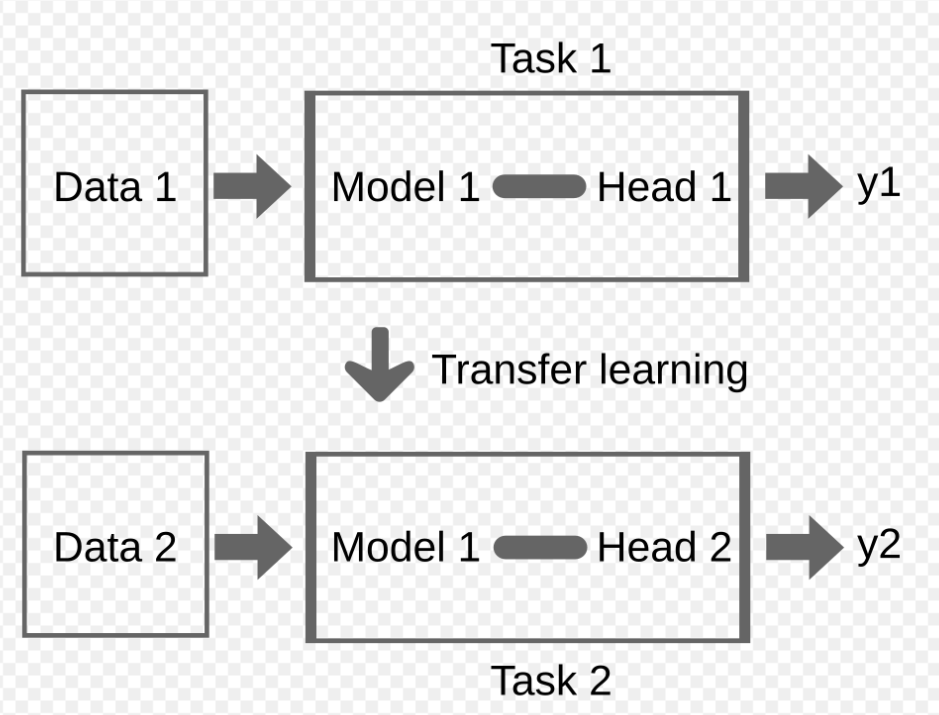



Data agumentation and Transfer Learning have their application, 
    if we produce fruits in production line so the Data agumentation is applyed as image classificatin technique for defective parts whereas 
    if we have little data and if we did data agumentation also the accuracy will be low so we will use Transfer Learning

like we deal with disater and we have 700 image 300 from it free from disaster and 400 not free so the TL have the role to supply by neural networl a huge data of 700 image     

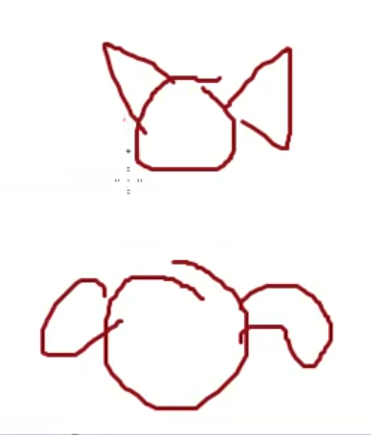

why Transfer learning is effective ??
    1- Design NN : weights randomly 
    2- Train on other data "huge amount of data and from other field"
    3- eliminitae first and last layer"s" ----> this will increase the accuracy
    4- add first and last layer"s"
    5- train on real data "small data"

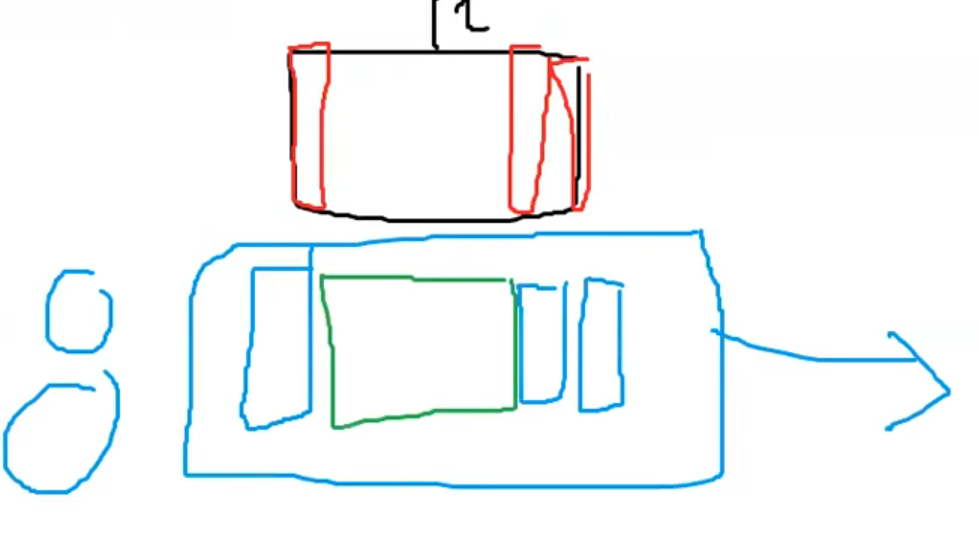
        - to be noted now the first and last layer with randomly weights so when now train the real data "small" this will hapeen according to customized small data

        - this means that middle layer is trained only for edges not related to the entered object

    
## trainable concept

this param is determined for some  layers if i need train it or not 
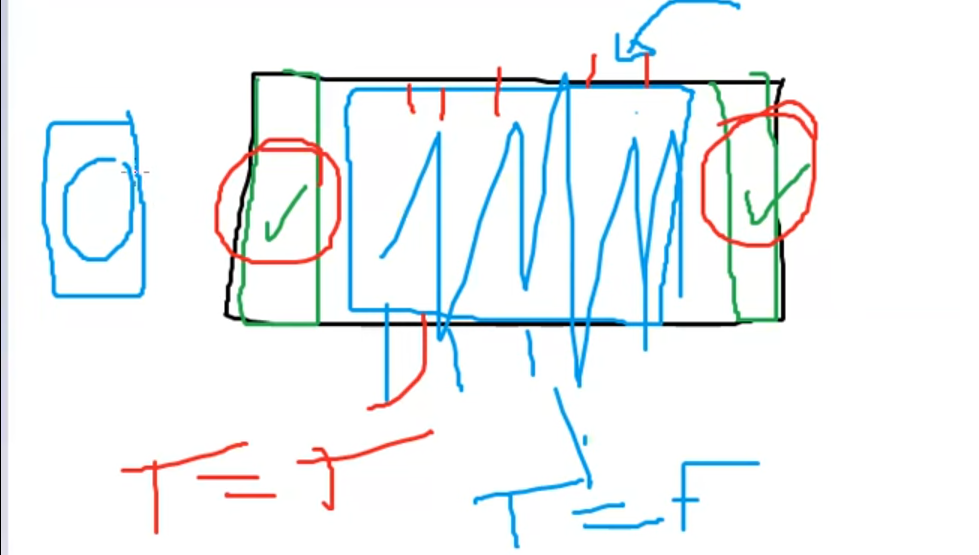

    it is prefered not to train the middle layer which is trained before 
###     Definition: 
    A trainable concept refers to a modular component of a pre-trained model that can be fine-tuned or adapted to a specific task.
###     Process: 
    Instead of training an entire model from scratch, in transfer learning, we often freeze some layers or components of a pre-trained model (which are considered as trainable concepts) and only update the parameters of specific layers related to the new task. This approach allows leveraging the knowledge and representations learned during pre-training.
###     Example: 
    In image classification using Convolutional Neural Networks (CNNs), the lower layers of a pre-trained model like VGG or ResNet can be considered as trainable concepts. These layers capture low-level features (e.g., edges, textures) that are generally useful across many image-related tasks.
###     facebook 
facebook developed pytorch lib cause they have huge amount of data and trained the model by neural network in this lib 
    whereas now will use pytorch for transfer learning





##      pretrain concept
if we select pretrain =false this mean will use the neural network from pytorch before the traing cause i will train it on my images not by the lib

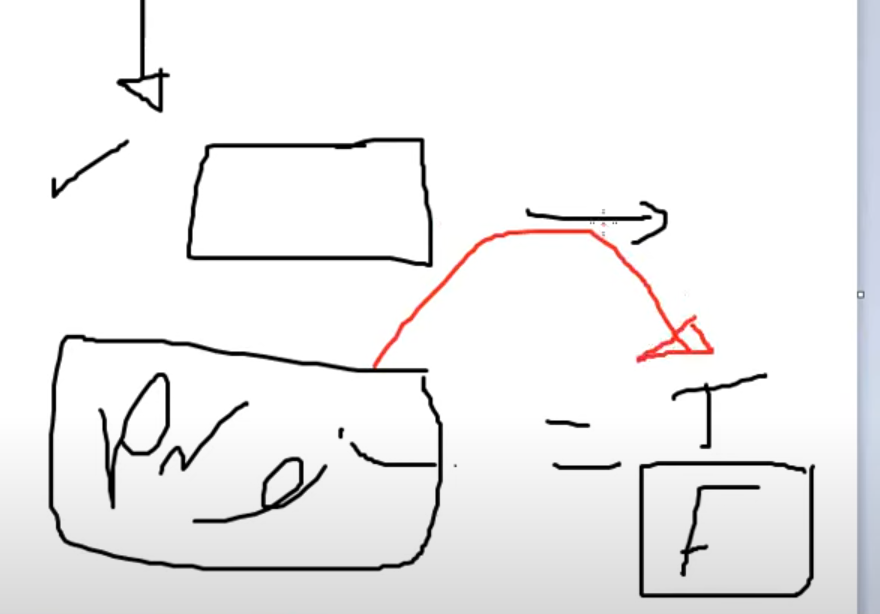
###     Definition: 
    Pre-training involves training a model on a large dataset or a specific task that is potentially related to the target task, but not identical.
###     Process: 
    During pre-training, the model learns general features and representations from the data it is trained on. This phase aims to capture broad patterns and structures that can be useful across various related tasks.
###     Example: 
    In natural language processing (NLP), models like BERT (Bidirectional Encoder Representations from Transformers) are pre-trained on large text corpora using tasks like masked language modeling or next sentence prediction


## Benefits: 
By leveraging pre-trained models and trainable concepts, transfer learning can significantly reduce the amount of labeled data required for training new models and can often lead to improved performance compared to training from scratch.


## NN for TL

### Alex Net
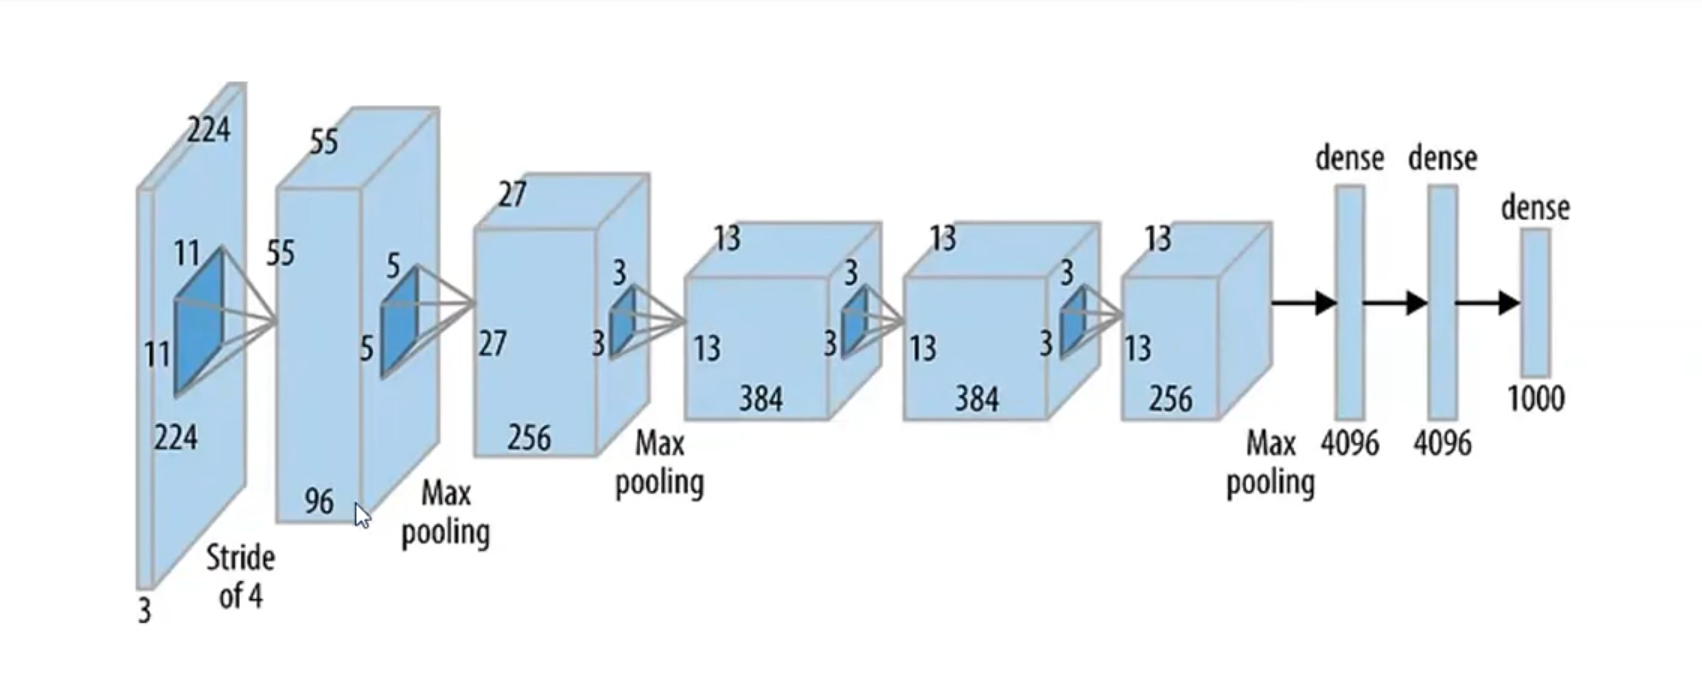
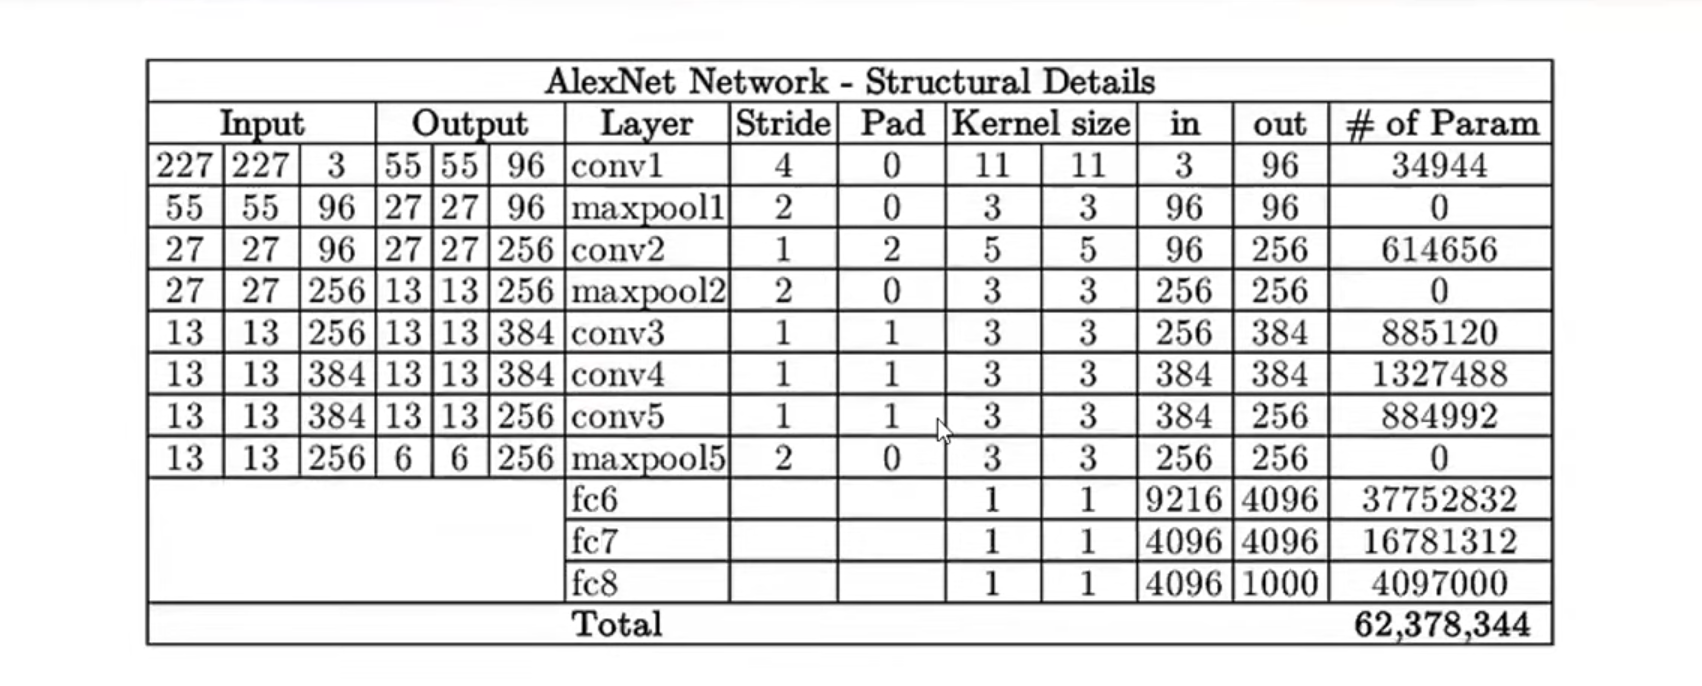


### VGG 16,19
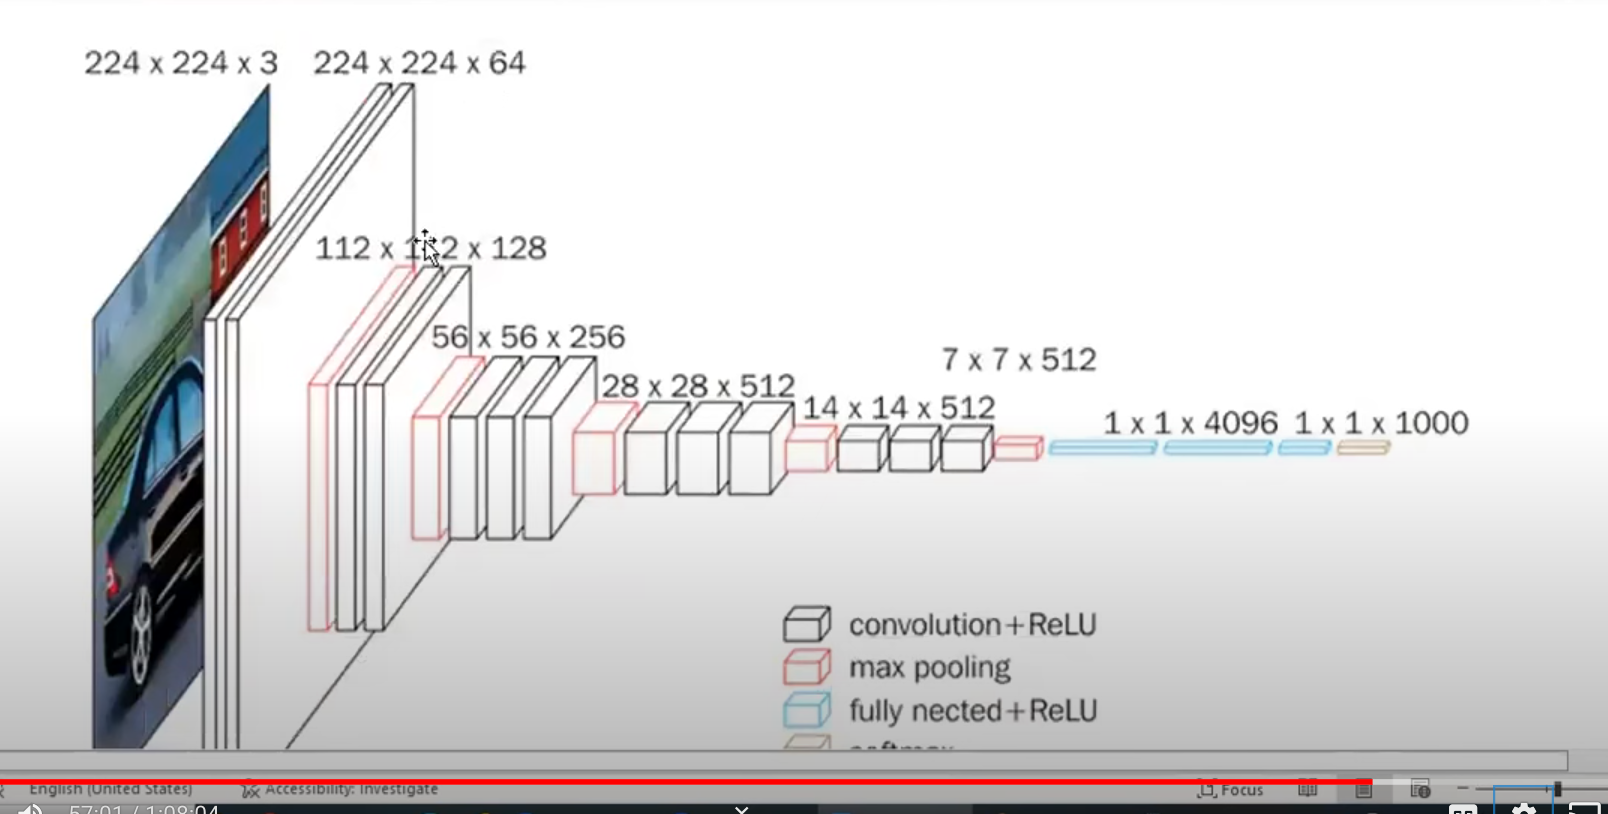
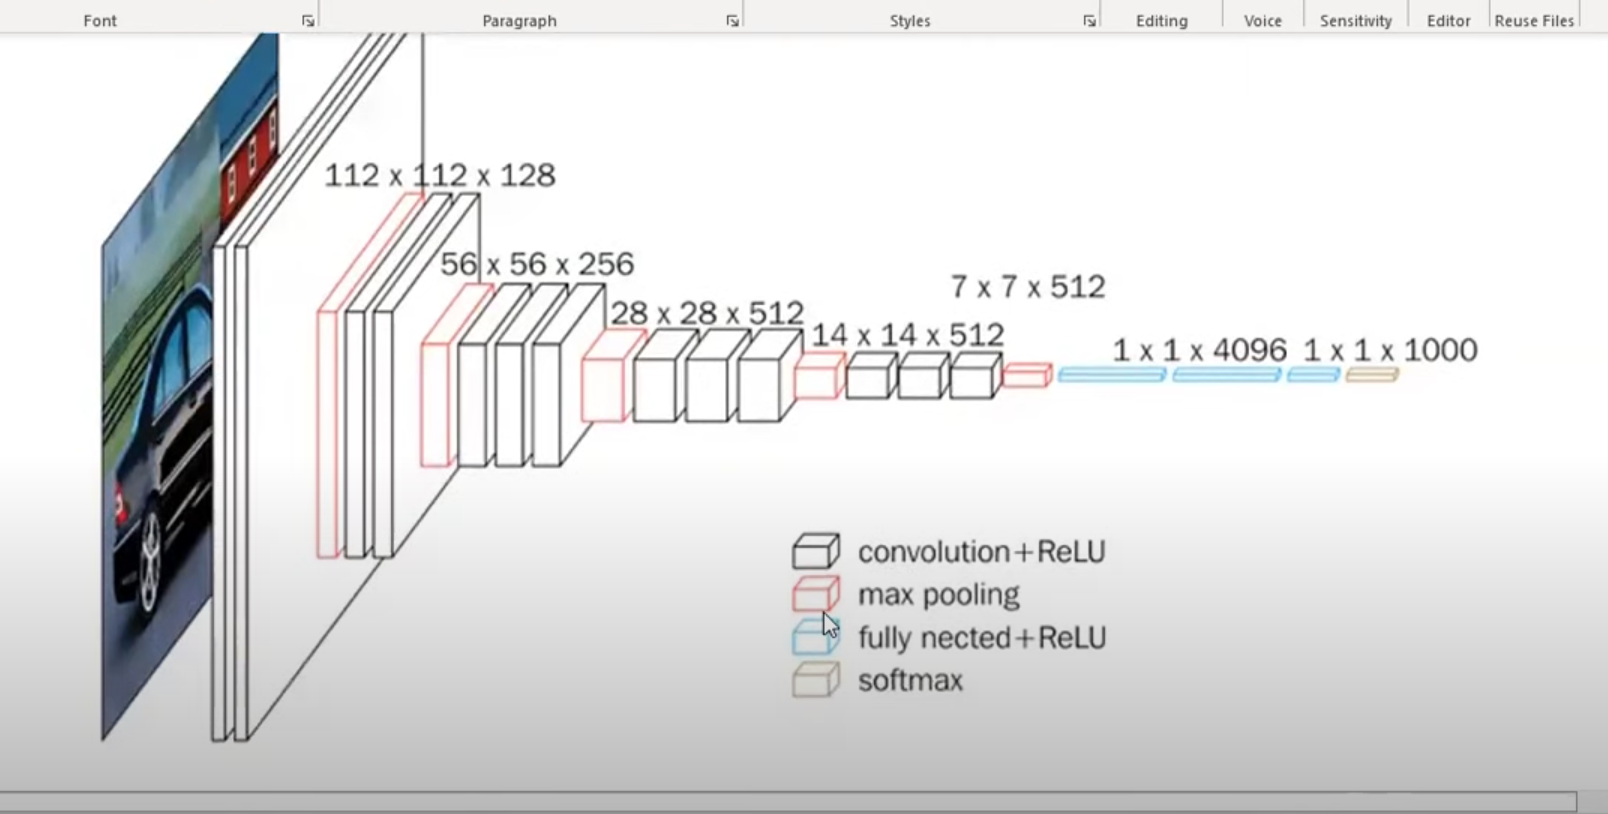

### inception
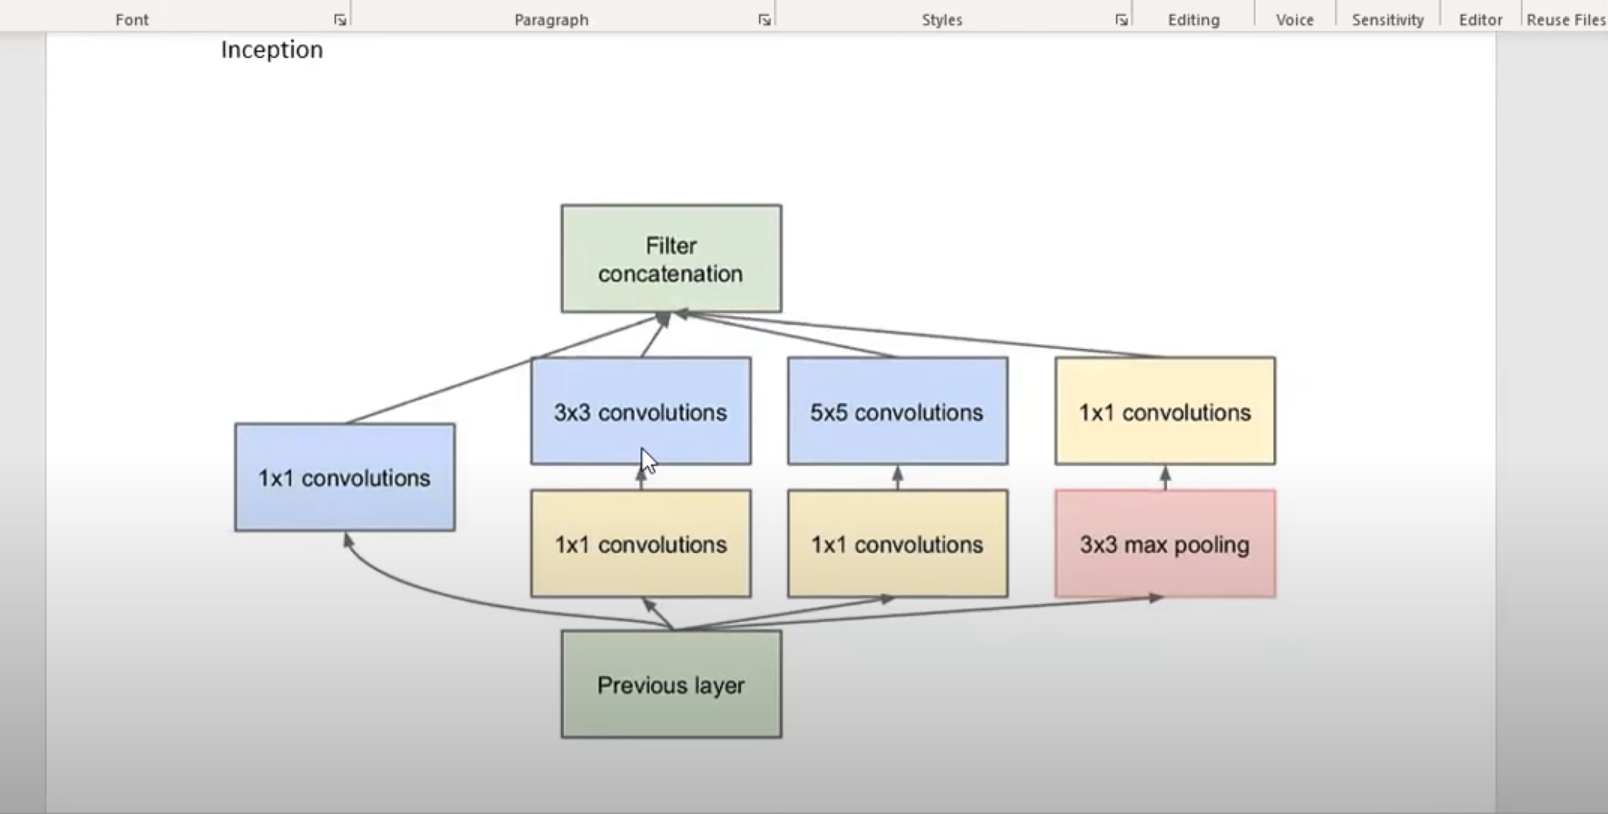


### Comparsion among the most popular NN in TL 
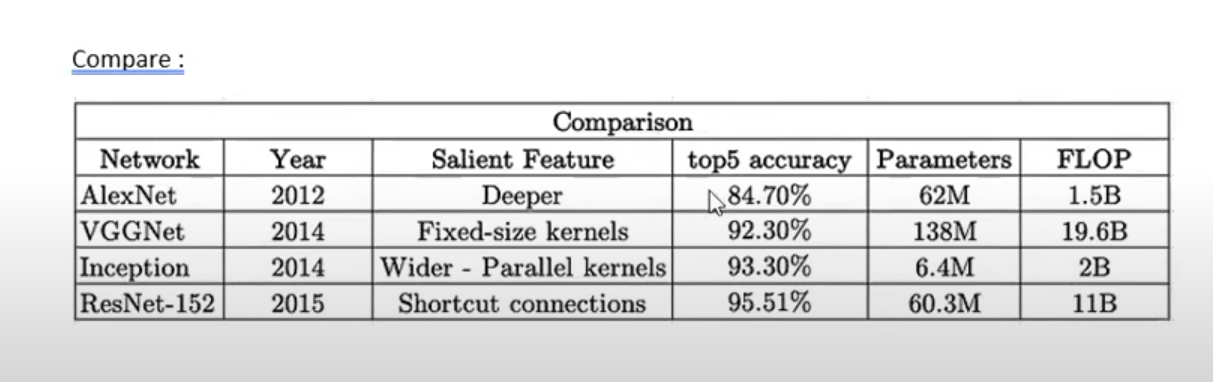






## TL and Data augumentation

both are used usually at the same time but somtimes we use one technique according to the application

## TL APP


الكود الاصلي

https://www.kaggle.com/code/suniliitb96/tutorial-keras-transfer-learning-with-resnet50


الداتا

https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition/code

الشبكة 

https://www.kaggle.com/datasets/keras/resnet50/

## Tutorial Keras: Transfer Learning with ResNet50 for image classification on Cats & Dogs dataset

### Suni Kumar

This kernel is intended to be a tutorial on Keras around image files handling for Transfer Learning using pre-trained weights from ResNet50 convnet.

Though loading all train & test images resized (224 x 224 x 3) in memory would have incurred ~4.9GB of memory, the plan was to batch source image data during the training, validation & testing pipeline. Keras ImageDataGenerator supports batch sourcing image data for all training, validation and testing. Actually, it is quite clean and easy to use Keras ImageDataGenerator except few limitations (listed at the end).

Keras ImageDataGenerator expects labeled training images to be available in certain folder heirarchy, 'train' data was manually split into 10k for training & 2.5k for validation and re-arranged into the desired folder hierarchy. Even 'test' images had to rearranged due to a known issue in flow_from_directory.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import os



### Global Constants

In [ ]:
# Fixed for our Cats & Dogs classes
NUM_CLASSES = 2

# Fixed for Cats & Dogs color images
CHANNELS = 3

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3


# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 32
BATCH_SIZE_VALIDATION = 32

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 1



# Paths to your data directories
# Directories
train_dir = '/media/ahmed-ferganey/AI1/00-Database/TransferLearning/TLbykeras/DogsCats/train'
valid_dir = '/media/ahmed-ferganey/AI1/00-Database/TransferLearning/TLbykeras/DogsCats/test'


# Check directory existence
print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))


In [ ]:
# Import necessary libraries
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator




import tensorflow as tf

# Explicitly allow TensorFlow to use GPU memory growth
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Optionally, limit GPU memory usage if needed
# tf.config.experimental.set_virtual_device_configuration(
#     device, [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])

# Verify if TensorFlow detects GPUs
print("Num GPUs Available:", len(physical_devices))



#                   
# Check available GPUs
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(physical_devices))

# Optional: Print details about each GPU
for gpu in physical_devices:
    print(gpu)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))





# TensorFlow version check (not necessary for functionality)
print(tf.__version__)



### 
### Below systax is available with TensorFlow 1.11 onwards but this upgrade is not available for Kaggle kernel yet
###
#import tensorflow as tf
#print(tf.__version__)
#import tensorflow as tf
#from tf.keras.applications import ResNet50
#from tf.keras.models import Sequential

### ResNet50
* Notice that resnet50 folder has 2 pre-trained weights files... xyz_tf_kernels.h5 & xyz_tf_kernels_NOTOP.h5
* The xyz_tf_kernels.h5 weights is useful for pure prediction of test image and this prediction will rely completely on ResNet50 pre-trained weights, i.e., it does not expected any training from our side
* Out intention in this kernel is Transfer Learning by using ResNet50 pre-trained weights except its TOP layer, i.e., the xyz_tf_kernels_NOTOP.h5 weights... Use this weights as initial weight for training new layer using train images

In [ ]:
resnet_weights_path = '/media/ahmed-ferganey/AI1/00-Database/TransferLearning/TLbykeras/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


#WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
#WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
#https://github.com/fchollet/deep-learning-models/blob/master/resnet50.py


### Define Our Transfer Learning Network Model Consisting of 2 Layers

Here, we are preparing specification or blueprint of the TensorFlow DAG (directed acyclcic graph) for just the MODEL part.

In [ ]:
#               import os
#               os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # This forces TensorFlow to use CPU only
#               import tensorflow as tf
#               
#               # Now import other necessary modules and continue with your TensorFlow code
#               from keras.applications.resnet50 import preprocess_input
#               from keras.preprocessing.image import ImageDataGenerator
#               
#               # Continue with your model definition and other code


In [ ]:
#Still not talking about our train/test data or any pre-processing.

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights='imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False


In [ ]:
model.summary()

### Compile Our Transfer Learning Model

In [ ]:

sgd = optimizers.legacy.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss=OBJECTIVE_FUNCTION, metrics=LOSS_METRICS)


### Prepare Keras Data Generators

Keras *ImageDataGenerator(...)* generates batches of tensor image data with real-time data augmentation. The data will be looped over (in batches). It is useful with large dataset to source, pre-process (resize, color conversion, image augmentation, batch normalize) & supply resulting images in batches to downstream Keras modeling components, namely *fit_generator(...)* & *predict_generator(...)* -vs- *fit(...)* & *predict(...)* for small dataset.

Kaggle competition rule expects Dog & Cat to be labeled as 1 & 0. Keras >> ImageDataGenerator >> flow_from_directory takes in 'classes' list for mapping it to LABEL indices otherwise treats sub-folders enumerated classes in alphabetical order, i.e., Cat is 0 & Dog is 1.

In [ ]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

# preprocessing_function is applied on each image but only after re-sizing & augmentation (resize => augment => pre-process)
# Each of the keras.application.resnet* preprocess_input MOSTLY mean BATCH NORMALIZATION (applied on each batch) stabilize the inputs to nonlinear activation functions
# Batch Normalization helps in faster convergence
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


print(f"Training directory: {train_dir}")
print(f"Validation directory: {valid_dir}")

# flow_From_directory generates batches of augmented data (where augmentation can be color conversion, etc)
# Both train & valid folders must have NUM_CLASSES sub-folders
# Flow from directory for training data
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_RESIZE, IMAGE_RESIZE),
    batch_size=BATCH_SIZE_TRAINING,
    class_mode='categorical')
print(f"Found {train_generator.samples} training images belonging to {train_generator.num_classes} classes.")

#valid_dir


# Flow from directory for validation data
validation_generator = data_generator.flow_from_directory(
    valid_dir,
    target_size=(IMAGE_RESIZE, IMAGE_RESIZE),
    batch_size=BATCH_SIZE_VALIDATION,
    class_mode='categorical')
print(f"Found {validation_generator.samples} validation images belonging to {validation_generator.num_classes} classes.")


In [ ]:
# Max number of steps that these generator will have opportunity to process their source content
# len(train_generator) should be 'no. of available train images / BATCH_SIZE_TRAINING'
# len(valid_generator) should be 'no. of available train images / BATCH_SIZE_VALIDATION'
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))

### Train Our Model With Cats & Dogs Train (splitted) Data Set

In [ ]:
# Early stopping & checkpointing the best model in ../working dir & restoring that as our model for prediction
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = '../working/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')


In [ ]:
# Grid Search is an ideal candidate for distributed machine learning
# Pseudo code for hyperparameters Grid Search

'''
from sklearn.grid_search import ParameterGrid
param_grid = {'epochs': [5, 10, 15], 'steps_per_epoch' : [10, 20, 50]}

grid = ParameterGrid(param_grid)

# Accumulate history of all permutations (may be for viewing trend) and keep watching for lowest val_loss as final model
for params in grid:
    print(params)
'''

In [ ]:
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)
model.load_weights("../working/best.hdf5")

### Training Metrics

One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics (training accuracy, training loss, validation loss & validation accuracy) for each epoch. Note that training accuracy & loss during epoch steps are somewhat incomplete information and they are not recorded in history.

Observe that training uses early stopping, hence metrics is available for epochs run, not for NUM_EPOCHS.

In [ ]:
print(fit_history.history.keys())

In [ ]:
 plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['acc'])  
plt.plot(fit_history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
# NOTE that flow_from_directory treats each sub-folder as a class which works fine for training data
# Actually class_mode=None is a kind of workaround for test data which too must be kept in a subfolder

# batch_size can be 1 or any factor of test dataset size to ensure that test dataset is samples just once, i.e., no data is left out
test_generator = data_generator.flow_from_directory(
    directory = '/media/ahmed-ferganey/AI1/00-Database/TransferLearning/TLbykeras/dogs-vs-cats-redux-kernels-edition/test',
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

# Try batch size of 1+ in test_generator & check batch_index & filenames in resulting batches
'''
for i in test_generator:
    #print(test_generator.batch_index, test_generator.batch_size)
    idx = (test_generator.batch_index - 1) * test_generator.batch_size
    print(test_generator.filenames[idx : idx + test_generator.batch_size])
'''

### Observe Prediction Time With Different Batch Size

With GPU, 97s for full prediction with batch_size=100 -vs- 264s with 1. But note that to avoid ImageDataGenerator iterator repeatability, we need to use 1 as batch_size.

In [ ]:
# Reset before each call to predict
test_generator.reset()

pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

In [ ]:
TEST_DIR = '../input/test-files-prepd/test4keras/test4keras/'
f, ax = plt.subplots(5, 5, figsize = (15, 15))

for i in range(0,25):
    imgBGR = cv2.imread(TEST_DIR + test_generator.filenames[i])
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    
    # a if condition else b
    predicted_class = "Dog" if predicted_class_indices[i] else "Cat"

    ax[i//5, i%5].imshow(imgRGB)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Predicted:{}".format(predicted_class))    

plt.show()

In [ ]:
results_df = pd.DataFrame(
    {
        'id': pd.Series(test_generator.filenames), 
        'label': pd.Series(predicted_class_indices)
    })
results_df['id'] = results_df.id.str.extract('(\d+)')
results_df['id'] = pd.to_numeric(results_df['id'], errors = 'coerce')
results_df.sort_values(by='id', inplace = True)

results_df.to_csv('submission.csv', index=False)
results_df.head()

### Keras Limitations

* [10/02/2018] The *validation_split* is not supported in *fit_generator*, hence its expects ImageDataGenerator for pre-splitted train & valid.
* [10/02/2018] Model learning through *fit_generator* is not compatible for Sklearn *GridSearchCV* again *mostly* due to no support for *validation_split*.

### Followup Plan

1. Scale and pad and avoid aspect ratio change of original image through Keras ImageDataGenerator pre-processing insfrastructure
2. Image augmentation
3. Pipeline
4. Distributed ML for Grid Search on Spark Cluster

### References

1. [Transfer Learning by Dan B](https://www.kaggle.com/dansbecker/transfer-learning)

## TL pytorch APP

# 